# Ordinary Differential Equations (ODEs)

- [DifferentialEquations.jl docs](https://diffeq.sciml.ai/dev/index.html)

Define a model function representing the right-hand-side (RHS) of the system.
  - Out-of-place form: `f(u, p, t)` where `u` is the state variable(s), `p` is the parameter(s), and `t` is the independent variable (usually time). The output is the right hand side (RHS) of the differential equation system.
  - In-place form: `f!(du, u, p, t)`, where the output is saved to `du`. The rest is the same as the out-of-place form. The in-place function may be faster since it does not allocate a new array in each call.
- Initial conditions (`u0`) for the state variable(s).
- (Optional) parameter(s) `p`.
- Define a problem (e.g. `ODEProblem`) using the model function (`f`), initial condition(s) (`u0`), simulation time span (`tspan == (tstart, tend)`), and parameter(s) `p`.
- Solve the problem by calling `solve(prob)`.

## Radioactive decay example

The decaying rate of a nuclear isotope is proportional to its concentration (number):

$$
\frac{d}{dt}C(t) = - \lambda C(t)
$$

**State variable(s)**

- $C(t)$: The concentration (number) of a decaying nuclear isotope.

**Parameter(s)**

- $\lambda$: The rate constant of nuclear decay. The half-life: $t_{\frac{1}{2}} = \frac{ln2}{\lambda}$.

In [1]:
using OrdinaryDiffEq
using Plots

The exponential decay ODE model, out-of-place (3-parameter) form

In [2]:
expdecay(u, p, t) = p * u

expdecay (generic function with 1 method)

Setup ODE problem

In [3]:
p = -1.0 ## Parameter
u0 = 1.0 ## Initial condition
tspan = (0.0, 2.0) ## Simulation start and end time points
prob = ODEProblem(expdecay, u0, tspan, p) ## Define the problem
sol = solve(prob) ## Solve the problem

retcode: Success
Interpolation: 3rd order Hermite
t: 8-element Vector{Float64}:
 0.0
 0.10001999200479662
 0.34208427066999536
 0.6553980136343391
 1.0312652525315806
 1.4709405856363595
 1.9659576669700232
 2.0
u: 8-element Vector{Float64}:
 1.0
 0.9048193287657775
 0.7102883621328676
 0.5192354400036404
 0.35655576576996556
 0.2297097907863828
 0.14002247272452764
 0.1353360028400881

Visualize the solution with `Plots.jl`.

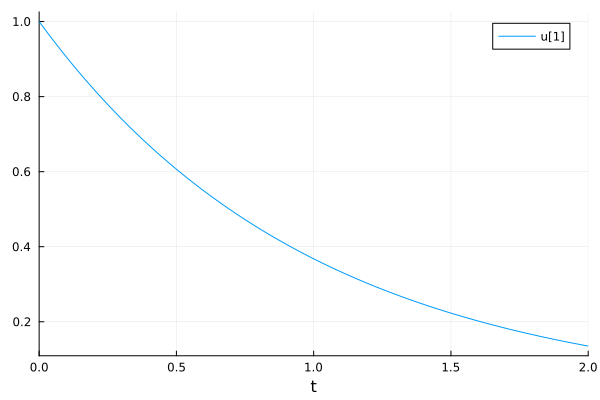

In [4]:
plot(sol)

## Solution handling
https://docs.sciml.ai/DiffEqDocs/stable/basics/solution/
The mostly used feature is `sol(t)`, the state variables at time `t`. `t` could be a scalar or a vector-like sequence. The result state variables are calculated with interpolation.

In [5]:
sol(1.0)

0.3678796381978344

In [6]:
sol(0.0:0.1:2.0)

t: 0.0:0.1:2.0
u: 21-element Vector{Float64}:
 1.0
 0.9048374180989603
 0.8187305973051514
 0.7408182261974484
 0.670319782243577
 0.6065302341562359
 0.5488116548085096
 0.49658509875978446
 0.4493280239179766
 0.4065692349272286
 ⋮
 0.30119273799114377
 0.2725309051375336
 0.24659717503493142
 0.22313045099430742
 0.20189530933816474
 0.18268185222253558
 0.16529821250790575
 0.14956912660454402
 0.13533600284008812

`sol.t`: time points by the solver.

In [7]:
sol.t

8-element Vector{Float64}:
 0.0
 0.10001999200479662
 0.34208427066999536
 0.6553980136343391
 1.0312652525315806
 1.4709405856363595
 1.9659576669700232
 2.0

`sol.u`: state variables at `sol.t`.

In [8]:
sol.u

8-element Vector{Float64}:
 1.0
 0.9048193287657775
 0.7102883621328676
 0.5192354400036404
 0.35655576576996556
 0.2297097907863828
 0.14002247272452764
 0.1353360028400881

## The SIR model

A more complicated example is the SIR model describing infectious disease spreading. There are 3 state variables and 2 parameters.

$$
\begin{align}
\frac{d}{dt}S(t) &= - \beta S(t)I(t)  \\
\frac{d}{dt}I(t) &= \beta S(t)I(t)  - \gamma I(t)  \\
\frac{d}{dt}R(t) &= \gamma I(t)
\end{align}
$$

**State variable(s)**

- $S(t)$ : the fraction of susceptible people
- $I(t)$ : the fraction of infectious people
- $R(t)$ : the fraction of recovered (or removed) people

**Parameter(s)**

- $\beta$ : the rate of infection when susceptible and infectious people meet
- $\gamma$ : the rate of recovery of infectious people

In [9]:
using OrdinaryDiffEq
using Plots

Here we use the in-place form: `f!(du, u, p ,t)` for the SIR model. The output is written to the first argument `du`, without allocating a new array in each function call.

In [10]:
function sir!(du, u, p, t)
    s, i, r = u
    β, γ = p
    v1 = β * s * i
    v2 = γ * i
    du[1] = -v1
    du[2] = v1 - v2
    du[3] = v2
    return nothing
end

sir! (generic function with 1 method)

Setup parameters, initial conditions, time span, and the ODE problem.

In [11]:
p = (β=1.0, γ=0.3)
u0 = [0.99, 0.01, 0.00]
tspan = (0.0, 20.0)
prob = ODEProblem(sir!, u0, tspan, p)

ODEProblem with uType Vector{Float64} and tType Float64. In-place: true
Non-trivial mass matrix: false
timespan: (0.0, 20.0)
u0: 3-element Vector{Float64}:
 0.99
 0.01
 0.0

Solve the problem

In [12]:
sol = solve(prob)

retcode: Success
Interpolation: 3rd order Hermite
t: 17-element Vector{Float64}:
  0.0
  0.08921318693905476
  0.3702862715172094
  0.7984257132319627
  1.3237271485666187
  1.991841832691831
  2.7923706947355837
  3.754781614278828
  4.901904318934307
  6.260476636498209
  7.7648912410433075
  9.39040980993922
 11.483861023017885
 13.372369854616487
 15.961357172044833
 18.681426667664056
 20.0
u: 17-element Vector{Vector{Float64}}:
 [0.99, 0.01, 0.0]
 [0.9890894703413342, 0.010634484617786016, 0.00027604504087978485]
 [0.9858331594901347, 0.012901496825852227, 0.0012653436840130785]
 [0.9795270529591532, 0.017282420996456258, 0.003190526044390597]
 [0.9689082167415561, 0.02463126703444545, 0.006460516223998508]
 [0.9490552312363142, 0.03827338797605378, 0.012671380787632141]
 [0.9118629475333939, 0.06347250098224964, 0.024664551484356558]
 [0.8398871089274511, 0.11078176031568547, 0.049331130756863524]
 [0.7075842068024722, 0.19166147882272844, 0.1007543143747994]
 [0.508146028721987

Visualize the solution

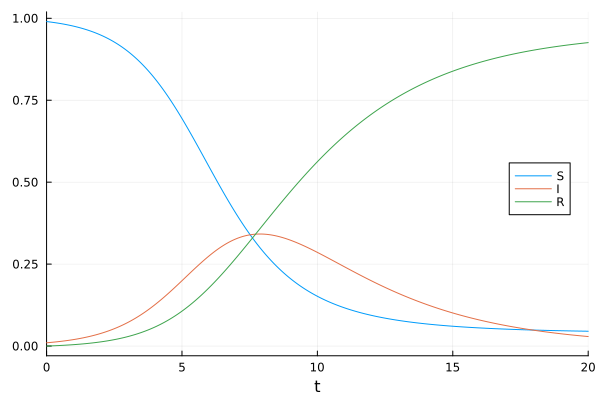

In [13]:
plot(sol, labels=["S" "I" "R"], legend=:right)

`sol[i]`: all components at time step `i`

In [14]:
sol[2]

3-element Vector{Float64}:
 0.9890894703413342
 0.010634484617786016
 0.00027604504087978485

`sol[i, j]`: `i`th component at time step `j`

In [15]:
sol[1, 2]

0.9890894703413342

`sol[i, :]`: the time series for the `i`th component.

In [16]:
sol[1, :]

17-element Vector{Float64}:
 0.99
 0.9890894703413342
 0.9858331594901347
 0.9795270529591532
 0.9689082167415561
 0.9490552312363142
 0.9118629475333939
 0.8398871089274511
 0.7075842068024722
 0.508146028721987
 0.31213222024413995
 0.18215683096365565
 0.10427205468919205
 0.07386737407725845
 0.05545028910907714
 0.047334990695892025
 0.04522885458929332

`sol(t, idxs=1)`: the 1st element in time point(s) `t` with interpolation. `t` can be a scalar or a vector.

In [17]:
sol(10, idxs=2)

0.28576194586813003

In [18]:
sol(0.0:0.1:20.0, idxs=2)

t: 0.0:0.1:20.0
u: 201-element Vector{Float64}:
 0.01
 0.010713819530291442
 0.01147737632963402
 0.012293955863322855
 0.013167034902663112
 0.014100286700885235
 0.015097588761311391
 0.016163031360643162
 0.01730091874845442
 0.018515771780096318
 ⋮
 0.03561030823283819
 0.03471833422630802
 0.03384816241692694
 0.03299928861769087
 0.032171218254199684
 0.031363466364657075
 0.030575557599870556
 0.029807026223251362
 0.029057416110814645

## Non-autonomous ODEs

In non-autonomous ODEs, term(s) in the right-hand-side (RHS) maybe time-dependent. For example, in this pendulum model has an external, time-dependent, force.

$$
\begin{aligned}
\dot{\theta} &= \omega(t) \\
\dot{\omega} &= -1.5\frac{g}{l}sin(\theta(t)) + \frac{3}{ml^2}M(t)
\end{aligned}
$$

- $\theta$: pendulum angle
- $\omega$: angular rate
- M: time-dependent external torque
- $l$: pendulum length
- $g$: gradational acceleration

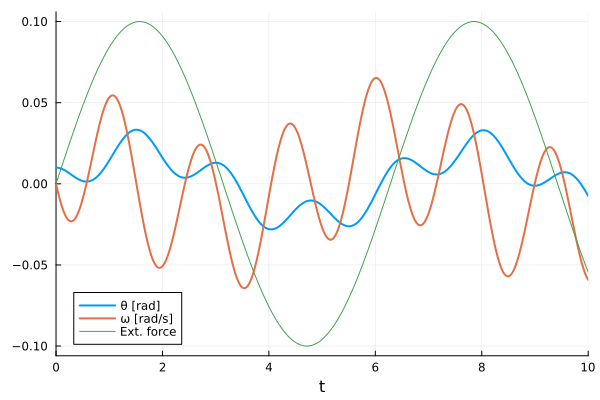

In [19]:
using OrdinaryDiffEq
using Plots

function pendulum!(du, u, p, t)
    l = 1.0                             ## length [m]
    m = 1.0                             ## mass [kg]
    g = 9.81                            ## gravitational acceleration [m/s²]
    du[1] = u[2]                        ## θ'(t) = ω(t)
    du[2] = -3g / (2l) * sin(u[1]) + 3 / (m * l^2) * p(t) # ω'(t) = -3g/(2l) sin θ(t) + 3/(ml^2)M(t)
    return nothing
end

u0 = [0.01, 0.0]                     ## initial angular deflection [rad] and angular velocity [rad/s]
tspan = (0.0, 10.0)                  ## time interval

M = t -> 0.1 * sin(t)                   ## external torque [Nm] as the parameter for the pendulum model

prob = ODEProblem(pendulum!, u0, tspan, M)
sol = solve(prob)

plot(sol, linewidth=2, xaxis="t", label=["θ [rad]" "ω [rad/s]"])
plot!(M, tspan..., label="Ext. force")

## Linear ODE system

The ODE system could be anything as long as it returns the derivatives of state variables. In this example, the ODE system is described by a matrix differential operator.

$\dot{u} = Au$

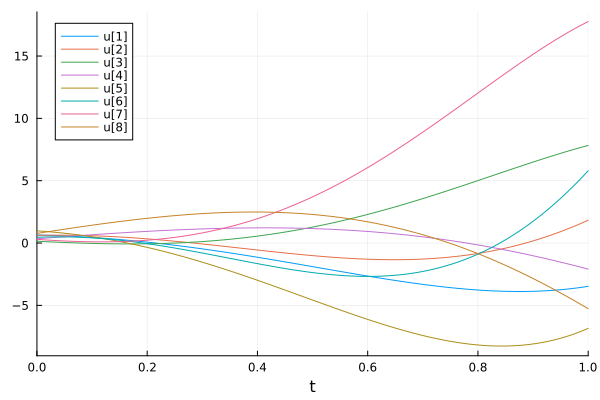

In [20]:
using OrdinaryDiffEq
using Plots

A = [
    1.0 0 0 -5
    4 -2 4 -3
    -4 0 0 1
    5 -2 2 3
]

u0 = rand(4, 2)

tspan = (0.0, 1.0)
f = (u, p, t) -> A * u
prob = ODEProblem(f, u0, tspan)
sol = solve(prob)
plot(sol)

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*